<a href="https://colab.research.google.com/github/PoliNemkova/conflict_prediction_2025/blob/main/%5B2%5D_Conflict_Prediction_LLM_for_Ethiopia_feature_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/grive/')

Mounted at /content/grive/


### Acled data

In [ ]:
# loading ACLED
acled = pd.read_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/acled_bin_all_countries_since_2015.csv')

acled.head(10)

,Country_Name_Short,sum(ACLED_Fatalities),STARTDATE,ENDDATE,abs_change,pct_increase,bin_esc_30
0,Afghanistan,271,2020-01-13,2020-01-20,-1478.0,-8.450543e+01,0
1,Afghanistan,796,2020-09-14,2020-09-21,525.0,1.937269e+02,1
2,Afghanistan,17,2022-12-12,2022-12-19,-779.0,-9.786432e+01,0
3,Afghanistan,17,2023-04-17,2023-04-24,0.0,0.000000e+00,0
4,Afghanistan,14,2023-05-15,2023-05-22,-3.0,-1.764706e+01,0
5,Albania,0,2021-06-14,2021-06-21,0.0,0.000000e+00,0
6,Albania,0,2019-01-07,2019-01-14,0.0,0.000000e+00,0
7,Albania,0,2020-08-31,2020-09-07,0.0,0.000000e+00,0
8,Algeria,0,2018-09-24,2018-10-01,0.0,0.000000e+00,0
9,Algeria,1,2020-05-18,2020-05-25,1.0,1.000000e+12,1


In [ ]:
acled['Country_Name_Short'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Austria',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bosnia and Herzegovina',
       'Burundi', 'Canada', 'Cameroon', "Cote d'Ivoire",
       'Central African Republic', 'Chad', 'China', 'Costa Rica',
       'Germany', 'Dominican Republic', 'Ecuador', 'Estonia', 'Ethiopia',
       'Georgia', 'Guatemala', 'Guinea', 'Haiti', 'Hungary', 'Indonesia',
       'India', 'Ireland', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Japan',
       'Cambodia', 'Liberia', 'Libya', 'Lesotho', 'Mali', 'Myanmar',
       'Montenegro', 'Malaysia', 'Mayotte', 'Namibia', 'Nepal', 'Nigeria',
       'Niger', 'Norway', 'Pakistan', 'Peru', 'Portugal',
       "Korea, Dem. People's Rep.", 'Romania', 'Rwanda', 'South Africa',
       'Saudi Arabia', 'Senegal', 'Sierra Leone', 'El Salvador',
       'Sri Lanka', 'Sudan', 'Suriname', 'Slovenia', 'Sweden', 'Tanzania',
       'Thailand', 'Tunisia', 'Turkey', 'Uganda', 'Uzbekistan',
       'Venezuela', 'Vietnam', 'Kos

In [ ]:
acled_ethiopia = acled[(acled['Country_Name_Short'] == 'Ethiopia') &
                    (acled['STARTDATE'] <= '2022-01-01') &
                    (acled['STARTDATE'] >= '2020-01-01')]

len(acled_ethiopia)

103

In [ ]:
acled_ethiopia['sum(ACLED_Fatalities)'].describe()

,sum(ACLED_Fatalities)
count,103.000000
mean,131.349515
std,208.347641
min,0.000000
25%,12.000000
50%,51.000000
75%,175.000000
max,1590.000000


In [ ]:
# applying transformation for normalizing the fatalities
import numpy as np
acled_ethiopia['log_fatalities'] = np.log(acled_ethiopia['sum(ACLED_Fatalities)'] + 1)

<ipython-input-7-3fa01dc73ea1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_ethiopia['log_fatalities'] = np.log(acled_ethiopia['sum(ACLED_Fatalities)'] + 1)


In [ ]:
acled_ethiopia.sort_values(by='STARTDATE', inplace=True)

<ipython-input-8-56d606f913b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_ethiopia.sort_values(by='STARTDATE', inplace=True)


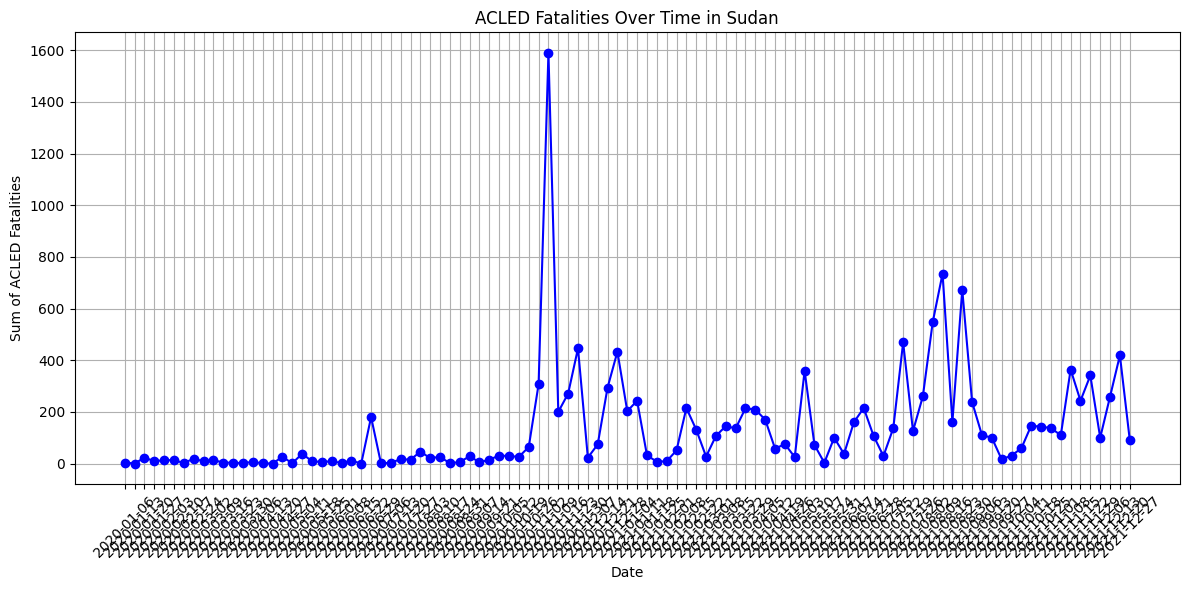

In [ ]:
# Importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd

# Sample data with your specified columns
data = {
    'STARTDATE': acled_ethiopia['STARTDATE'].to_list() ,
    'sum(ACLED_Fatalities)': acled_ethiopia['sum(ACLED_Fatalities)'].to_list()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['STARTDATE'], df['sum(ACLED_Fatalities)'], marker='o', linestyle='-', color='b')
plt.title('ACLED Fatalities Over Time in Sudan')
plt.xlabel('Date')
plt.ylabel('Sum of ACLED Fatalities')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


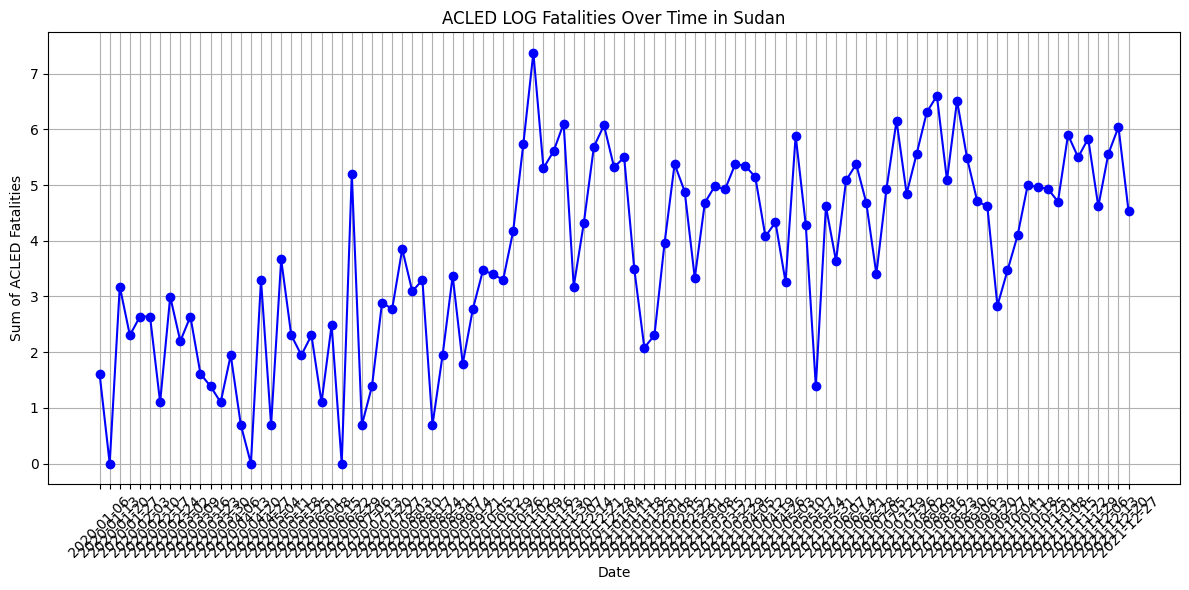

In [ ]:
# Importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd

# Sample data with your specified columns
data = {
    'STARTDATE': acled_ethiopia['STARTDATE'].to_list() ,
    'log_fatalities': acled_ethiopia['log_fatalities'].to_list()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['STARTDATE'], df['log_fatalities'], marker='o', linestyle='-', color='b')
plt.title('ACLED LOG Fatalities Over Time in Sudan')
plt.xlabel('Date')
plt.ylabel('Sum of ACLED Fatalities')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Adjusting ACLED to be biweekly

starts, ends, fatalities = [], [], []

for i in range(0, len(acled_ethiopia) - 1, 2):
    starts.append(acled_ethiopia['STARTDATE'].iloc[i])
    ends.append(acled_ethiopia['ENDDATE'].iloc[i + 1])
    fatalities.append(
        acled_ethiopia['sum(ACLED_Fatalities)'].iloc[i] + acled_ethiopia['sum(ACLED_Fatalities)'].iloc[i + 1]
    )

acled_ethiopia_biweekly = pd.DataFrame({
    'STARTDATE': starts,
    'ENDDATE': ends,
    'sum(ACLED_Fatalities)': fatalities
})

acled_ethiopia_biweekly.head(10)

,STARTDATE,ENDDATE,sum(ACLED_Fatalities)
0,2020-01-06,2020-01-20,4
1,2020-01-20,2020-02-03,32
2,2020-02-03,2020-02-17,26
3,2020-02-17,2020-03-02,21
4,2020-03-02,2020-03-16,21
5,2020-03-16,2020-03-30,7
6,2020-03-30,2020-04-13,8
7,2020-04-13,2020-04-27,1
8,2020-04-27,2020-05-11,27
9,2020-05-11,2020-05-25,47


In [ ]:
len(acled_ethiopia_biweekly)

51

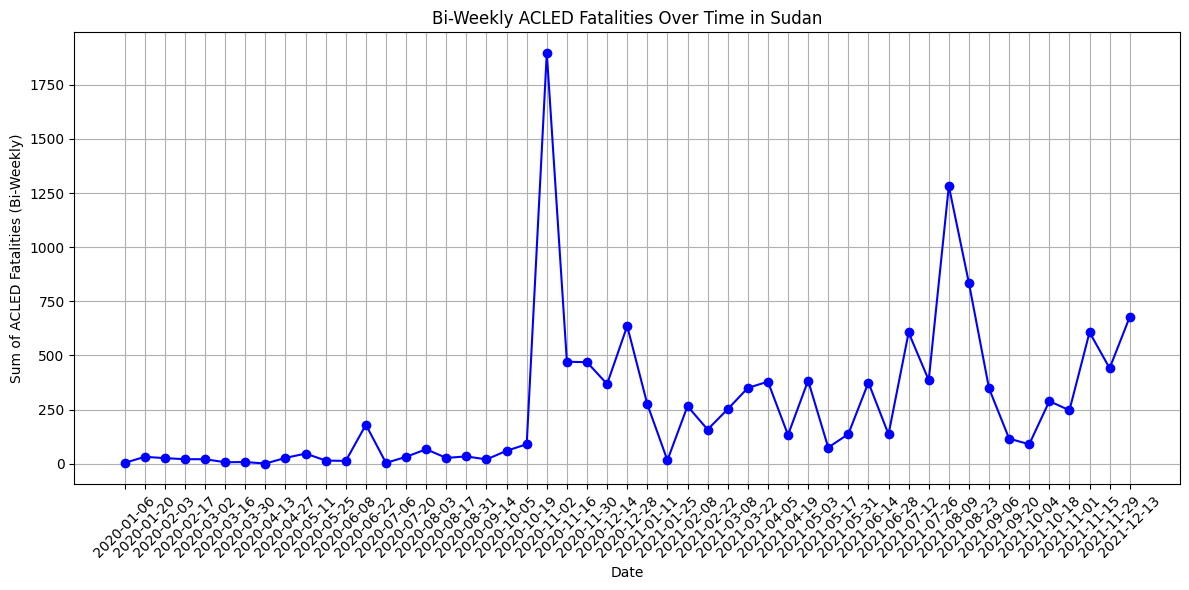

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = acled_ethiopia_biweekly
# Plotting the bi-weekly aggregated data
plt.figure(figsize=(12, 6))
plt.plot(df['STARTDATE'], df['sum(ACLED_Fatalities)'], marker='o', linestyle='-', color='b')
plt.title('Bi-Weekly ACLED Fatalities Over Time in Sudan')
plt.xlabel('Date')
plt.ylabel('Sum of ACLED Fatalities (Bi-Weekly)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Defining positive examples

fatalities_std = np.std(acled_ethiopia_biweekly['sum(ACLED_Fatalities)'])

# Define conditions with safe handling for division by zero
conditions = [

    # option 2 - dramatic increase in fatalities by 100%
    ((acled_ethiopia_biweekly['sum(ACLED_Fatalities)'].shift(1) != 0) &
     (((acled_ethiopia_biweekly['sum(ACLED_Fatalities)'] / acled_ethiopia_biweekly['sum(ACLED_Fatalities)'].shift(1))) > 2)),

    # option 3 - extreme/outlier - value change over one std
    ((acled_ethiopia_biweekly['sum(ACLED_Fatalities)'].shift(1) - acled_ethiopia_biweekly['sum(ACLED_Fatalities)']) > fatalities_std),

    # option 1 - increase is over 50% or more than 50 victims
    #(acled_sudan_biweekly['sum(ACLED_Fatalities)'] > 50), #|
    #((acled_sudan_biweekly['sum(ACLED_Fatalities)'].shift(1) != 0) &
    # ((1 - (acled_sudan_biweekly['sum(ACLED_Fatalities)'] / acled_sudan_biweekly['sum(ACLED_Fatalities)'].shift(1))) > 0.5)),
]

# Define corresponding values
choices = [2, 3]

# Apply np.select() to assign values based on conditions
acled_ethiopia_biweekly['importance'] = np.select(conditions, choices, default=0)

acled_ethiopia_biweekly['importance'] = acled_ethiopia_biweekly['importance'].apply(lambda x: 1 if x > 0 else 0)

acled_ethiopia_biweekly

,STARTDATE,ENDDATE,sum(ACLED_Fatalities),importance
0,2020-01-06,2020-01-20,4,0
1,2020-01-20,2020-02-03,32,1
2,2020-02-03,2020-02-17,26,0
3,2020-02-17,2020-03-02,21,0
4,2020-03-02,2020-03-16,21,0
5,2020-03-16,2020-03-30,7,0
6,2020-03-30,2020-04-13,8,0
7,2020-04-13,2020-04-27,1,0
8,2020-04-27,2020-05-11,27,1
9,2020-05-11,2020-05-25,47,0


In [ ]:
# adding timespots for simplicity

acled_ethiopia_biweekly['backlogged_importance'] = acled_ethiopia_biweekly['importance'].shift(-1).fillna(0).astype(int)
acled_ethiopia_biweekly['timeslot'] = range(0, len(acled_ethiopia_biweekly))
acled_ethiopia_biweekly

,STARTDATE,ENDDATE,sum(ACLED_Fatalities),importance,backlogged_importance,timeslot
0,2020-01-06,2020-01-20,4,0,1,0
1,2020-01-20,2020-02-03,32,1,0,1
2,2020-02-03,2020-02-17,26,0,0,2
3,2020-02-17,2020-03-02,21,0,0,3
4,2020-03-02,2020-03-16,21,0,0,4
5,2020-03-16,2020-03-30,7,0,0,5
6,2020-03-30,2020-04-13,8,0,0,6
7,2020-04-13,2020-04-27,1,0,1,7
8,2020-04-27,2020-05-11,27,1,0,8
9,2020-05-11,2020-05-25,47,0,0,9


### Texts and events data

In [ ]:
Ethiopia_2020_2021 = pd.read_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/Ethiopia_2020_2021+text+enc.csv')

In [ ]:
Ethiopia_2020_2021.columns

Index(['Unnamed: 0', 'globaleventid', 'sqldate', 'monthyear', 'year',
       'fractiondate', 'actor1code', 'actor1name', 'actor1countrycode',
       'actor1knowngroupcode', 'actor1ethniccode', 'actor1religion1code',
       'actor1religion2code', 'actor1type1code', 'actor1type2code',
       'actor1type3code', 'actor2code', 'actor2name', 'actor2countrycode',
       'actor2knowngroupcode', 'actor2ethniccode', 'actor2religion1code',
       'actor2religion2code', 'actor2type1code', 'actor2type2code',
       'actor2type3code', 'isrootevent', 'eventcode', 'cameocodedescription',
       'eventbasecode', 'eventrootcode', 'quadclass', 'goldsteinscale',
       'nummentions', 'numsources', 'numarticles', 'avgtone', 'actor1geotype',
       'actor1geofullname', 'actor1geocountrycode', 'actor1geoadm1code',
       'actor1geoadm2code', 'actor1geolat', 'actor1geolong',
       'actor1geofeatureid', 'actor2geotype', 'actor2geofullname',
       'actor2geocountrycode', 'actor2geoadm1code', 'actor2geoadm2cod

In [ ]:
len(Ethiopia_2020_2021)

1472

In [ ]:
# Matching timeslots to data in GDELT Sudan


acled_ethiopia_biweekly['STARTDATE'] = pd.to_datetime(acled_ethiopia_biweekly['STARTDATE'], errors='coerce')
acled_ethiopia_biweekly['ENDDATE'] = pd.to_datetime(acled_ethiopia_biweekly['ENDDATE'], errors='coerce')

# Create an IntervalIndex from the first table
timeslot_intervals = pd.IntervalIndex.from_arrays(
    acled_ethiopia_biweekly['STARTDATE'],
    acled_ethiopia_biweekly['ENDDATE'],
    closed='both'
)

# Assign the timeslot based on which interval each date falls into
Ethiopia_2020_2021['timeslot'] = Ethiopia_2020_2021['sqldate'].apply(
    lambda x: acled_ethiopia_biweekly.loc[timeslot_intervals.contains(x), 'timeslot'].iloc[0] if any(timeslot_intervals.contains(x)) else None
)

# fix the last timeslot that didn't have shifting reference

Ethiopia_2020_2021['timeslot'].fillna(26, inplace=True)
Ethiopia_2020_2021['timeslot'] = Ethiopia_2020_2021['timeslot'].astype(int)

Ethiopia_2020_2021.head(5)


<ipython-input-27-32ae14d95e67>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ethiopia_2020_2021['timeslot'].fillna(26, inplace=True)


,Unnamed: 0,index,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,...,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text,embeddings,timeslot
0,1,7,897976283,2020-01-09,202001,2020,2020.0247,IND,DELHI,IND,...,47692,9.03333,38.7000,-603097,20200109234500,https://www.devdiscourse.com/article/national/...,POINT (38.7 9.03333),A woman from Guinea has been arrested for alle...,[-1.48271814e-01 -5.59100434e-02 -1.93097860e-...,0
1,4,9,898237715,2020-01-10,202001,2020,2020.0274,SOM,SOMALI,SOM,...,40842,8.00000,44.0000,-618202,20200110234500,https://newbusinessethiopia.com/politics/ethio...,POINT (44 8),The Ogaden National Liberation Front (ONLF) in...,[-3.08606714e-01 1.18709646e-01 1.24765724e-...,0
2,5,10,898237716,2020-01-10,202001,2020,2020.0274,SOMELI,SOMALI,SOM,...,40842,8.00000,44.0000,-618202,20200110234500,https://newbusinessethiopia.com/politics/ethio...,POINT (44 8),The Ogaden National Liberation Front (ONLF) in...,[-3.08606714e-01 1.18709646e-01 1.24765724e-...,0
3,6,8,898237393,2020-01-10,202001,2020,2020.0274,IGOUNO,UNITED NATIONS,NaN,...,47692,9.03333,38.7000,-603097,20200110234500,https://newbusinessethiopia.com/trade/addis-ab...,POINT (38.7 9.03333),"African countries seeking to reduce the cost, ...",[-2.15511307e-01 1.04543164e-01 4.89756703e-...,0
4,7,0,898414989,2020-01-11,202001,2020,2020.0301,AFR,AFRICA,AFR,...,149281,11.16670,39.1667,-603950,20200111234500,https://newbusinessethiopia.com/health/unicef-...,POINT (39.1667 11.1667),The European Union (EU) and UNICEF launched a ...,[-1.02982648e-01 3.29593062e-01 -1.97269171e-...,0


In [ ]:
Ethiopia_2020_2021['timeslot'].nunique()

49

In [ ]:
Ethiopia_2020_2021.iloc[450]

,450
Unnamed: 0,682
index,677
globaleventid,945649475
sqldate,2020-09-09
monthyear,202009
...,...
sourceurl,https://www.thisdaylive.com/index.php/2020/09/...
geometry,POINT (38 8)
text,Okello Oculi writes that street protests attra...
embeddings,[-1.91543102e-01 3.17605376e-01 -1.22240141e-...


In [ ]:
# dropping bunch of columns from GDELT that are currently not used

Ethiopia_2020_2021_light = Ethiopia_2020_2021[['globaleventid', 'sqldate', 'goldsteinscale',
       'nummentions', 'numsources', 'numarticles', 'avgtone',  'text',
       'embeddings', 'timeslot']]

In [ ]:
# adding importance (positivity sign) to the GDELT set

Ethiopia_2020_2021_light = pd.merge(Ethiopia_2020_2021_light, acled_ethiopia_biweekly[['timeslot', 'backlogged_importance']], on='timeslot', how='left')
Ethiopia_2020_2021_light

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance
0,897976283,2020-01-09,-5.0,1,1,1,-6.111111,A woman from Guinea has been arrested for alle...,[-1.48271814e-01 -5.59100434e-02 -1.93097860e-...,0,1
1,898237715,2020-01-10,0.0,10,1,10,-3.761755,The Ogaden National Liberation Front (ONLF) in...,[-3.08606714e-01 1.18709646e-01 1.24765724e-...,0,1
2,898237716,2020-01-10,-5.0,3,1,3,-3.761755,The Ogaden National Liberation Front (ONLF) in...,[-3.08606714e-01 1.18709646e-01 1.24765724e-...,0,1
3,898237393,2020-01-10,4.0,10,1,10,4.505814,"African countries seeking to reduce the cost, ...",[-2.15511307e-01 1.04543164e-01 4.89756703e-...,0,1
4,898414989,2020-01-11,-4.0,10,1,10,1.241135,The European Union (EU) and UNICEF launched a ...,[-1.02982648e-01 3.29593062e-01 -1.97269171e-...,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,1019159669,2021-12-14,8.0,8,1,8,-4.477612,"Photo: AP / Ben Curtis, File\n\nTo receive Glo...",[ 5.32737970e-02 2.69514591e-01 7.15751573e-...,50,0
1468,1019160261,2021-12-14,8.0,2,1,2,-4.477612,"Photo: AP / Ben Curtis, File\n\nTo receive Glo...",[ 5.32737970e-02 2.69514591e-01 7.15751573e-...,50,0
1469,1019159670,2021-12-14,8.0,2,1,2,-4.477612,"Photo: AP / Ben Curtis, File\n\nTo receive Glo...",[ 5.32737970e-02 2.69514591e-01 7.15751573e-...,50,0
1470,1020207473,2021-12-21,1.9,3,1,3,-5.545287,The House of Representatives has resolved to i...,[-2.52439268e-02 2.15363443e-01 5.56837618e-...,50,0


In [ ]:
# working with positive examples

positive_articles = Ethiopia_2020_2021_light[Ethiopia_2020_2021_light['backlogged_importance'] == 1]
negative_articles = Ethiopia_2020_2021_light[Ethiopia_2020_2021_light['backlogged_importance'] == 0]

len(positive_articles), len(negative_articles)

(381, 1091)

In [ ]:
positive_articles['text'].nunique()

97

In [ ]:
negative_articles['text'].nunique()

191

In [ ]:
rng = ['2023-03-11', '2023-04-11', '2023-04-13', '2023-04-15',
       '2023-04-16', '2023-04-17', '2023-04-18', '2023-04-19',
       '2023-04-20', '2023-04-21', '2023-04-23', '2023-04-24']
rng1 = ['2023-04-15','2023-04-16', '2023-04-17']

In [ ]:
p = positive_articles[positive_articles['sqldate'].isin(rng)]

In [ ]:
n = negative_articles[negative_articles['sqldate'].isin(rng1)]

In [ ]:
p['sqldate'].unique()

array([], dtype=object)

In [ ]:
row

,1099
globaleventid,1138308855
sqldate,2023-11-05
goldsteinscale,-10.0
nummentions,8
numsources,1
numarticles,8
avgtone,-7.624633
text,RAMALLAH -- U.S. Secretary of State Antony Bli...
embeddings,[-1.64687261e-01 3.53060782e-01 -2.02570632e-...
timeslot,21


In [ ]:
for i, row in n.iterrows():
  print(row['sqldate'], row['text'])
  print('++++++')

2023-04-15 Fierce fighting raged in Sudan's capital despite a pause Sunday to help those caught up in the violence, on the second day of battles that left three UN staff among more than 50 civilians killed nationwide.

Doctors say hundreds are injured, while the World Health Organization warned "several of the nine hospitals in Khartoum receiving injured civilians have run out of blood, transfusion equipment, intravenous fluids and other vital supplies".

The World Food Programme said it was suspending operations in the impoverished country after the killing of its three workers.

The battles between the powerful armed forces and the Rapid Support Forces (RSF) sparked an international outcry and regional concern, including border closures by neighbours Egypt and Chad.

Deafening explosions and intense gunfire rattled buildings in the capital Khartoum's densely populated northern and southern suburbs as tanks rumbled on the streets and fighter jets roared overhead, witnesses said.

Figh

##### Cosine Similarity with Positive and Negative average embedding

In [ ]:
# getting mean positive embedding

arrays = []
for item in positive_articles['embeddings']:
  string_list = item.replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
  final = [float(number) for number in string_list]
  arrays.append(final)

array = np.array(arrays)
mean_positive_embedding = array.mean(axis=0)
len(mean_positive_embedding)

768

In [ ]:
# getting mean negative embedding

arrays = []
for item in negative_articles['embeddings']:
  string_list = item.replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
  final = [float(number) for number in string_list]
  arrays.append(final)

array = np.array(arrays)
mean_negative_embedding = array.mean(axis=0)
len(mean_negative_embedding)

768

In [ ]:
# calculate cosign similarity with negative and positive embeddings across the GDELT set

from sklearn.metrics.pairwise import cosine_similarity

cos_sim_pos = []
cos_sim_neg = []

for i in range(len(Ethiopia_2020_2021_light)):
  string_list = Ethiopia_2020_2021_light['embeddings'].iloc[i].replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
  numeric_embedding = [float(number) for number in string_list]
  similarity_positive = cosine_similarity(np.array(numeric_embedding).reshape(1, -1), np.array(mean_positive_embedding).reshape(1, -1))
  cos_sim_pos.append(similarity_positive[0][0])
  similarity_negative = cosine_similarity(np.array(numeric_embedding).reshape(1, -1), np.array(mean_negative_embedding).reshape(1, -1))
  cos_sim_neg.append(similarity_negative[0][0])

Ethiopia_2020_2021_light['cosine_similarity_positive'] = cos_sim_pos
Ethiopia_2020_2021_light['cosine_similarity_negative'] = cos_sim_neg

In [ ]:
Ethiopia_2020_2021_light.head(5)

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance,cosine_similarity_positive,cosine_similarity_negative
0,897976283,2020-01-09,-5.0,1,1,1,-6.111111,A woman from Guinea has been arrested for alle...,[-1.48271814e-01 -5.59100434e-02 -1.93097860e-...,0,1,0.774310,0.775914
1,898237715,2020-01-10,0.0,10,1,10,-3.761755,The Ogaden National Liberation Front (ONLF) in...,[-3.08606714e-01 1.18709646e-01 1.24765724e-...,0,1,0.890652,0.895087
2,898237716,2020-01-10,-5.0,3,1,3,-3.761755,The Ogaden National Liberation Front (ONLF) in...,[-3.08606714e-01 1.18709646e-01 1.24765724e-...,0,1,0.890652,0.895087
3,898237393,2020-01-10,4.0,10,1,10,4.505814,"African countries seeking to reduce the cost, ...",[-2.15511307e-01 1.04543164e-01 4.89756703e-...,0,1,0.845226,0.840977
4,898414989,2020-01-11,-4.0,10,1,10,1.241135,The European Union (EU) and UNICEF launched a ...,[-1.02982648e-01 3.29593062e-01 -1.97269171e-...,0,1,0.869820,0.858374


##### Topic Modeling

In [ ]:
# adding topic modeling

!pip install pandas numpy gensim scikit-learn nltk

import pandas as pd
import numpy as np
import nltk
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK data (only the first time)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load your dataset (replace this with your actual dataset)
articles = Ethiopia_2020_2021_light['text']

# Define custom stop words
stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)

# Preprocess the text
def preprocess_text(text):
    # Tokenize, remove punctuation, stop words, and convert to lowercase
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

articles['tokens'] = articles.apply(preprocess_text)


# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(articles['tokens'])

# Filter out words that occur too frequently or too rarely
dictionary.filter_extremes(no_below=2, no_above=0.5)

# Create the bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in articles['tokens']]


from gensim.models import LdaModel

# Train the LDA model
num_topics = 20  # Adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Display the topics found by the model
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)

# Function to get top N topics for a document
def get_top_topics(lda_model, corpus, n=3):
    top_topics = []
    for bow in corpus:
        topic_probs = lda_model.get_document_topics(bow)
        # Sort topics by their probability in descending order
        top_n = sorted(topic_probs, key=lambda x: x[1], reverse=True)[:n]
        top_topics.append([topic_id for topic_id, prob in top_n])
    return top_topics

# Assign top 3 topics to each article
articles['top_topics'] = get_top_topics(lda_model, corpus, n=3)

articles.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-40-3a27cc95d3ba>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles['tokens'] = articles.apply(preprocess_text)


(0, '0.011*"political" + 0.010*"somaliland" + 0.010*"abiy"')
(1, '0.011*"tigray" + 0.008*"ethnic" + 0.007*"amhara"')
(2, '0.008*"republic" + 0.008*"airlines" + 0.006*"africa"')
(3, '0.016*"abiy" + 0.012*"tigray" + 0.011*"tigrayans"')
(4, '0.025*"tigray" + 0.008*"million" + 0.007*"food"')
(5, '0.013*"oromo" + 0.010*"amnesty" + 0.009*"amhara"')
(6, '0.011*"boeing" + 0.007*"max" + 0.006*"facebook"')
(7, '0.027*"coffee" + 0.013*"says" + 0.011*"gift"')
(8, '0.015*"dam" + 0.014*"sudan" + 0.010*"egypt"')
(9, '0.022*"tigray" + 0.015*"haavisto" + 0.010*"abiy"')
(10, '0.024*"water" + 0.022*"ways" + 0.022*"airlines"')
(11, '0.018*"women" + 0.011*"africa" + 0.010*"state"')
(12, '0.014*"hirut" + 0.012*"refugees" + 0.009*"refugee"')
(13, '0.017*"tigray" + 0.010*"forces" + 0.008*"minister"')
(14, '0.028*"tigray" + 0.014*"humanitarian" + 0.013*"aid"')
(15, '0.012*"malaria" + 0.008*"cases" + 0.008*"pompeo"')
(16, '0.029*"africa" + 0.019*"trump" + 0.015*"continent"')
(17, '0.028*"purpose" + 0.021*"sudan

,text
0,A woman from Guinea has been arrested for alle...
1,The Ogaden National Liberation Front (ONLF) in...
2,The Ogaden National Liberation Front (ONLF) in...
3,"African countries seeking to reduce the cost, ..."
4,The European Union (EU) and UNICEF launched a ...


In [ ]:
topics[0][1]

'0.011*"political" + 0.010*"somaliland" + 0.010*"abiy"'

In [ ]:
topics[0]

(0, '0.011*"political" + 0.010*"somaliland" + 0.010*"abiy"')

In [ ]:
# Adding topic number and verbose to the GDELT set

topic_numbers = []
topics_verbose = []
for item in articles['top_topics']:
  top_topic_number = item[0]
  topic_verbose = topics[top_topic_number][1]
  #print(top_topic_number,' and verbose: ', topic_verbose )
  topic_numbers.append(top_topic_number)
  topics_verbose.append(topic_verbose)

Ethiopia_2020_2021_light['topic_number'] = topic_numbers
Ethiopia_2020_2021_light['topic_verbose'] = topics_verbose

Ethiopia_2020_2021_light.head()

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance,cosine_similarity_positive,cosine_similarity_negative,topic_number,topic_verbose
0,897976283,2020-01-09,-5.0,1,1,1,-6.111111,A woman from Guinea has been arrested for alle...,[-1.48271814e-01 -5.59100434e-02 -1.93097860e-...,0,1,0.774310,0.775914,2,"0.008*""republic"" + 0.008*""airlines"" + 0.006*""a..."
1,898237715,2020-01-10,0.0,10,1,10,-3.761755,The Ogaden National Liberation Front (ONLF) in...,[-3.08606714e-01 1.18709646e-01 1.24765724e-...,0,1,0.890652,0.895087,11,"0.018*""women"" + 0.011*""africa"" + 0.010*""state"""
2,898237716,2020-01-10,-5.0,3,1,3,-3.761755,The Ogaden National Liberation Front (ONLF) in...,[-3.08606714e-01 1.18709646e-01 1.24765724e-...,0,1,0.890652,0.895087,11,"0.018*""women"" + 0.011*""africa"" + 0.010*""state"""
3,898237393,2020-01-10,4.0,10,1,10,4.505814,"African countries seeking to reduce the cost, ...",[-2.15511307e-01 1.04543164e-01 4.89756703e-...,0,1,0.845226,0.840977,2,"0.008*""republic"" + 0.008*""airlines"" + 0.006*""a..."
4,898414989,2020-01-11,-4.0,10,1,10,1.241135,The European Union (EU) and UNICEF launched a ...,[-1.02982648e-01 3.29593062e-01 -1.97269171e-...,0,1,0.869820,0.858374,14,"0.028*""tigray"" + 0.014*""humanitarian"" + 0.013*..."


##### Sentiment score

In [ ]:
# adding sentiment score

!pip install nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sample DataFrame (replace this with your actual dataset)
articles = Ethiopia_2020_2021_light['text']

# Function to calculate sentiment score
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Add a new column for sentiment score
sentiment_scores = articles.apply(get_sentiment_score)
Ethiopia_2020_2021_light['sentiment_score'] = sentiment_scores
sentiment_scores

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text
0,-0.8316
1,-0.7951
2,-0.7951
3,0.9985
4,0.9979
...,...
1467,-0.5106
1468,-0.5106
1469,-0.5106
1470,-0.9795


In [ ]:
sentiment_scores.describe()

,text
count,1298.000000
mean,-0.239076
std,0.867715
min,-0.999800
25%,-0.995550
50%,-0.915400
75%,0.889100
max,0.999800


In [ ]:
Ethiopia_2020_2021_light.head(5)

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance,cosine_similarity_positive,cosine_similarity_negative,topic_number,topic_verbose,sentiment_score,summary
0,1078772253,2023-01-04,3.0,10,1,10,-0.711744,Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0,0.0,0.872888,0.874157,18,"0.011*""african"" + 0.009*""central"" + 0.009*""sec...",-0.9265,Sudan is one of the world's largest gold produ...
1,1078771985,2023-01-04,3.0,10,1,10,-0.711744,Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0,0.0,0.872888,0.874157,18,"0.011*""african"" + 0.009*""central"" + 0.009*""sec...",-0.9265,Sudan is one of the world's largest gold produ...
2,1080099234,2023-01-13,-10.0,4,1,4,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359,17,"0.023*""violence"" + 0.014*""military"" + 0.009*""s...",-0.9996,On 23 October Myanmar’s (Burma) military – the...
3,1080099446,2023-01-13,-10.0,10,1,10,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359,17,"0.023*""violence"" + 0.014*""military"" + 0.009*""s...",-0.9996,On 23 October Myanmar’s (Burma) military – the...
4,1080099238,2023-01-13,-0.3,6,1,6,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359,17,"0.023*""violence"" + 0.014*""military"" + 0.009*""s...",-0.9996,On 23 October Myanmar’s (Burma) military – the...


In [ ]:
Ethiopia_2020_2021_light['topic_verbose'].iloc[1]

'0.018*"women" + 0.011*"africa" + 0.010*"state"'

In [ ]:
import pandas as pd

# Sample data
data = Ethiopia_2020_2021_light['topic_verbose']
df = pd.DataFrame(data)

# Function to split the data string into separate columns
def split_data_string(row):
    # Split by ' + ' to get individual components
    components = row.split(' + ')
    # Extract the numeric value and word from each component
    split_components = []
    for component in components:
        value, word = component.split('*')
        # Remove quotes from the word
        word = word.replace('"', '')
        split_components.extend([float(value), word])
    return split_components

# Apply the function and create new columns
Ethiopia_2020_2021_light[['dominance_score_1', 'topic1', 'dominance_score_2', 'topic2', 'dominance_score_3', 'topic3']] = Ethiopia_2020_2021_light['topic_verbose'].apply(split_data_string).apply(pd.Series)
# Display the resulting DataFrame
Ethiopia_2020_2021_light.head()


,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,...,cosine_similarity_negative,topic_number,topic_verbose,sentiment_score,dominance_score_1,topic1,dominance_score_2,topic2,dominance_score_3,topic3
0,897976283,2020-01-09,-5.0,1,1,1,-6.111111,A woman from Guinea has been arrested for alle...,[-1.48271814e-01 -5.59100434e-02 -1.93097860e-...,0,...,0.775914,2,"0.008*""republic"" + 0.008*""airlines"" + 0.006*""a...",-0.8316,0.008,republic,0.008,airlines,0.006,africa
1,898237715,2020-01-10,0.0,10,1,10,-3.761755,The Ogaden National Liberation Front (ONLF) in...,[-3.08606714e-01 1.18709646e-01 1.24765724e-...,0,...,0.895087,11,"0.018*""women"" + 0.011*""africa"" + 0.010*""state""",-0.7951,0.018,women,0.011,africa,0.010,state
2,898237716,2020-01-10,-5.0,3,1,3,-3.761755,The Ogaden National Liberation Front (ONLF) in...,[-3.08606714e-01 1.18709646e-01 1.24765724e-...,0,...,0.895087,11,"0.018*""women"" + 0.011*""africa"" + 0.010*""state""",-0.7951,0.018,women,0.011,africa,0.010,state
3,898237393,2020-01-10,4.0,10,1,10,4.505814,"African countries seeking to reduce the cost, ...",[-2.15511307e-01 1.04543164e-01 4.89756703e-...,0,...,0.840977,2,"0.008*""republic"" + 0.008*""airlines"" + 0.006*""a...",0.9985,0.008,republic,0.008,airlines,0.006,africa
4,898414989,2020-01-11,-4.0,10,1,10,1.241135,The European Union (EU) and UNICEF launched a ...,[-1.02982648e-01 3.29593062e-01 -1.97269171e-...,0,...,0.858374,14,"0.028*""tigray"" + 0.014*""humanitarian"" + 0.013*...",0.9979,0.028,tigray,0.014,humanitarian,0.013,aid


In [ ]:
# Most common topics in Sudan GDELT

Ethiopia_2020_2021_light['topic_number'].value_counts().sort_values(ascending=False)

,count
topic_number,
18,133
4,127
17,122
14,120
13,111
2,109
11,88
7,83
19,73


In [ ]:
Ethiopia_2020_2021_light.to_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/Ethiopia_2020_2021_light.csv')

#### Summaries

In [ ]:
# since concutination of the full text articles is too long I add summaries (of each article separately)
# THIS CELL TOOK ME ~ 7-8 HOURS TO RUN



from tqdm import tqdm
import pandas as pd
from transformers import pipeline

# Initialize the summarization pipeline using BART
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

Ethiopia_unique_texts = Ethiopia_2020_2021_light.drop_duplicates(subset=['text'])
Ethiopia_unique_texts.reset_index(drop=True, inplace=True)


articles = pd.DataFrame()
articles['text'] = Ethiopia_unique_texts['text']

# Function to generate a summary for each article with input length control
def generate_summary(text, max_length=50, min_length=25):
    # Truncate the text to a maximum of 1024 tokens
    if len(text.split()) > 512:  # Adjust this number if needed
        text = ' '.join(text.split()[:512])

    # Generate summary
    try:
        summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        return f"Error: {e}"


# Add progress tracking
tqdm.pandas()

# Assuming ukraine_light['text'] contains the articles
articles['summary'] = articles['text'].progress_apply(generate_summary)


# Apply the summarization function to each article
#summaries = articles.apply(generate_summary)

#Ethiopia_2020_2021_light['summary'] = summaries['text']

# Display the DataFrame with summaries
articles.to_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/summaries_Ethiopia_unique_texts.csv')


100%|██████████| 283/283 [1:18:57<00:00, 16.74s/it]


In [ ]:
#sudan_light['summary'] = summaries['text']
#summaries.to_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/summaries.csv')
Ethiopia_2020_2021_light = pd.read_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/Ethiopia_2020_2021_light.csv')
summaries = pd.read_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/summaries_Ethiopia_unique_texts.csv')

In [ ]:
summaries

,Unnamed: 0,text,summary
0,0,A woman from Guinea has been arrested for alle...,The passenger was intercepted by the customs p...
1,1,The Ogaden National Liberation Front (ONLF) in...,The Ogaden National Liberation Front (ONLF) in...
2,2,"African countries seeking to reduce the cost, ...","African countries seeking to reduce the cost, ..."
3,3,The European Union (EU) and UNICEF launched a ...,Ethiopia has experienced rapid and sustained i...
4,4,"Over 128,000 smallholder farmers organized in ...","The factory is built on 7,890 square meters of..."
...,...,...,...
278,278,It has been sixty years since Africans took ba...,Few African nations have broken the poverty sh...
279,279,"Photo: AP / Ben Curtis, File\n\nTo receive Glo...",There are a number of alarming signs that Ethi...
280,280,"The Oversight Board, a group Facebook created ...",The Oversight Board reviewed a post in Amharic...
281,281,The House of Representatives has resolved to i...,The House of Representatives has resolved to i...


In [ ]:
len(summaries)

283

In [ ]:
len(Ethiopia_2020_2021_light)

1472

In [ ]:
# merging
merged = Ethiopia_2020_2021_light.merge(articles, on = 'text')

In [ ]:
len(merged)

1472

In [ ]:
# comparing the quality of the summaries

print(
    '_________FULL TEXT: ', merged['text'].iloc[756], '\n\n\n',
    '_________SUMMARY: ', merged['summary'].iloc[756])

In [ ]:
merged['text'].isna().sum()

0

In [ ]:
merged['text'].iloc[756]

'UPDATE: U.S. Senate Confirms Linda Thomas-Greenfield as UN Ambassador\n\n“This confirmation sends a message that the United States is back and that our foreign service is back,” said Rep. Karen Bass, D-Calif., who chairs a House Foreign Affairs subcommittee on Africa. “We as a country and as a world are safer with Linda Thomas-Greenfield serving as the United States ambassador to the United Nations.” (AP photo)\n\nThe Associated Press\n\nWASHINGTON (AP) — Linda Thomas-Greenfield was confirmed as U.S. ambassador to the United Nations on Tuesday, a victory for the Biden administration as it seeks to reengage with the world body after four years of President Donald Trump’s “America First” posture left the U.S. isolated internationally.\n\nSenators voted 78-20 to confirm Thomas-Greenfield to the post, which will be a Cabinet-level position.\n\nThomas-Greenfield, a retired 35-year veteran of the foreign service who resigned during the Trump administration, will be the third African America

In [ ]:
Ethiopia_2020_2021_light.columns

Index(['Unnamed: 0', 'globaleventid', 'sqldate', 'goldsteinscale',
       'nummentions', 'numsources', 'numarticles', 'avgtone', 'text',
       'embeddings', 'timeslot', 'backlogged_importance',
       'cosine_similarity_positive', 'cosine_similarity_negative',
       'topic_number', 'topic_verbose', 'sentiment_score', 'dominance_score_1',
       'topic1', 'dominance_score_2', 'topic2', 'dominance_score_3', 'topic3'],
      dtype='object')

In [ ]:
Ethiopia_2020_2021_light['dominance_score_1'].mean()

0.019245244565217392

In [ ]:
# compiling the set by timeslot

goldsteinscale, events_density, nummentions, numsources, numarticles, avgtone, cosine_similarity_positive, cosine_similarity_negative, strings, topics, sentiments, sentiment_std, avg_embeddings, unique_articles, summaries_all, goldstein_min_maxs, topic_1s, topic_2s, topic_3s, dominance_score_1s, dominance_score_2s, dominance_score_3s  = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],[], [], [], [], [], [], []
timeslots = Ethiopia_2020_2021_light['timeslot'].unique()

for i in timeslots:

  part = merged[merged['timeslot']==i]

  goldsteinscale_average = part['goldsteinscale'].mean()
  goldstein_min_max = [part['goldsteinscale'].min(), part['goldsteinscale'].max()]
  nummentions_sum = part['nummentions'].sum()
  numsources_sum = part['numsources'].sum()
  numarticles_sum = part['numarticles'].sum()
  avgtone_average = part['avgtone'].mean()
  cosine_similarity_positive_average = part['cosine_similarity_positive'].mean()
  cosine_similarity_negative_average = part['cosine_similarity_negative'].mean()
  event_density = len(part)
  topic = part['topic_number'].mode().iloc[0]
  sentiment = part['sentiment_score'].mean()
  sentiment_std_part = part['sentiment_score'].std()
  # dealing with topcs
  topic_1 = part['topic1'].mode().iloc[0]
  topic_2 = part['topic2'].mode().iloc[0]
  topic_3 = part['topic3'].mode().iloc[0]

  dominance_score_1 = part['dominance_score_1'].mean()
  dominance_score_2 = part['dominance_score_2'].mean()
  dominance_score_3 = part['dominance_score_3'].mean()


  # calc avg emb
  arrays = []
  for item in part['embeddings']:
    string_list = item.replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
    final = [float(number) for number in string_list]
    arrays.append(final)
  array = np.array(arrays)
  avg_embedding = array.mean(axis=0)

  goldsteinscale.append(goldsteinscale_average)
  goldstein_min_maxs.append(goldstein_min_max)
  nummentions.append(nummentions_sum)
  numsources.append(numsources_sum)
  numarticles.append(numarticles_sum)
  avgtone.append(avgtone_average)
  cosine_similarity_positive.append(cosine_similarity_positive_average)
  cosine_similarity_negative.append(cosine_similarity_negative_average)
  events_density.append(event_density)
  sentiments.append(sentiment)
  sentiment_std.append(sentiment_std_part)
  topics.append(topic)
  avg_embeddings.append(avg_embedding)
  topic_1s.append(topic_1)
  topic_2s.append(topic_2)
  topic_3s.append(topic_3)
  dominance_score_1s.append(dominance_score_1)
  dominance_score_2s.append(dominance_score_2)
  dominance_score_3s.append(dominance_score_3)

  # after here we're using unique articles NLP features
  part = part.drop_duplicates(subset=['text'])
  unique_articles_count = len(part)
  big_string = ''
  for j in range(len(part)):
    big_string = big_string + part['text'].iloc[j] + ' '+ str(part['sqldate'].iloc[j]) +' [SEP]'
  summaries_set = ''
  for j in range(len(part)):
    summaries_set = summaries_set + part['summary'].iloc[j] + ' '+ str(part['sqldate'].iloc[j]) +' [SEP]'

  strings.append(big_string)
  unique_articles.append(unique_articles_count)
  summaries_all.append(summaries_set)


biweekly_Ethiopia = pd.DataFrame({
    'timeslot': timeslots,
    'goldsteinscale': goldsteinscale,
    'goldstein_min_max': goldstein_min_maxs,
    'avgtone': avgtone,
    'events_density': events_density,
    'unique_articles': unique_articles,
    'nummentions': nummentions,
    'numsources': numsources,
    'numarticles': numarticles,
    'cosine_similarity_positive': cosine_similarity_positive,
    'cosine_similarity_negative': cosine_similarity_negative,
    'avg_embeddings': avg_embeddings,
    'topic': topics,
    'topic_1': topic_1s,
    'dominance_score_1': dominance_score_1s,
    'topic_2': topic_2s,
    'dominance_score_2': dominance_score_2s,
    'topic_3': topic_3s,
    'dominance_score_3': dominance_score_3s,
    'sentiment': sentiments,
    'sentiment_std': sentiment_std,
    'strings': strings,
    'summaries': summaries_all
})

biweekly_Ethiopia.head()

,timeslot,goldsteinscale,goldstein_min_max,avgtone,events_density,unique_articles,nummentions,numsources,numarticles,cosine_similarity_positive,...,topic_1,dominance_score_1,topic_2,dominance_score_2,topic_3,dominance_score_3,sentiment,sentiment_std,strings,summaries
0,0,-1.531250,"[-9.5, 8.0]",-0.092404,16,8,100,16,100,0.824041,...,dam,0.023500,egypt,0.017125,aid,0.015250,0.303844,0.690128,A woman from Guinea has been arrested for alle...,The passenger was intercepted by the customs p...
1,1,-0.978788,"[-10.0, 7.4]",-4.487025,33,6,141,33,141,0.884327,...,oromo,0.012303,amnesty,0.009576,amhara,0.008545,-0.581758,0.801355,Somalilandsun- Tensions between Iran and the U...,Tensions between Iran and the U.S. are edging ...
2,2,1.943636,"[-10.0, 8.0]",0.647828,55,9,273,55,214,0.683835,...,purpose,0.022164,sudan,0.015418,legitimate,0.013655,0.197865,0.475324,Africa must address issues of climate change i...,Africa must address issues of climate change i...
3,3,-1.893333,"[-10.0, 7.0]",-2.336778,30,10,101,30,101,0.787321,...,tigray,0.018800,egypt,0.012733,amhara,0.010900,-0.000407,0.742393,This year’s edition of the European Film Marke...,The European Film Market (EFM) runs February 2...
4,4,0.779070,"[-10.0, 7.0]",-1.434868,86,11,347,86,304,0.793354,...,women,0.015465,africa,0.010186,state,0.009140,0.141214,0.819876,Necessary Cookies\n\nThis cookie is used to di...,Used by Google Analytics to throttle request r...


In [ ]:
len(biweekly_Ethiopia['strings'][6])

27440

In [ ]:
len(biweekly_Ethiopia['summaries'][6])

881

In [ ]:
# adding keywords


!pip install keybert transformers torch

import pandas as pd
from keybert import KeyBERT

# Initialize KeyBERT with a pre-trained BERT model
kw_model = KeyBERT('all-MiniLM-L6-v2')  # You can use other models like 'distilbert-base-nli-mean-tokens'

# Sample DataFrame (replace this with your actual dataset)
articles = biweekly_Ethiopia['strings']

# Function to extract keywords using KeyBERT
def extract_keywords(text, model, top_n=10):
    keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=top_n)
    return [keyword[0] for keyword in keywords]

# Apply the function to extract keywords for each article
keywords_list = articles.apply(lambda x: extract_keywords(x, kw_model))
biweekly_Ethiopia['keywords'] = keywords_list
keywords_list

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,strings
0,"[smuggle narcotic, narcotic substance, arreste..."
1,"[somalilandsun tensions, somaliland participat..."
2,"[african climate, climate change, african grow..."
3,"[film markets, film market, film festivals, fi..."
4,"[israel election, israel president, election i..."
5,"[uganda virus, coronavirus, coronavirus covid,..."
6,"[ethiopian airline, ethiopian airlines, airlin..."
7,"[coronavirus china, world coronavirus, coronav..."
8,"[locusts ethiopia, desert locusts, locust land..."
9,"[xenophobia outbreak, racist xenophobic, xenop..."


In [ ]:
biweekly_Ethiopia.head()

,timeslot,goldsteinscale,goldstein_min_max,avgtone,events_density,unique_articles,nummentions,numsources,numarticles,cosine_similarity_positive,...,dominance_score_1,topic_2,dominance_score_2,topic_3,dominance_score_3,sentiment,sentiment_std,strings,summaries,keywords
0,0,-1.531250,"[-9.5, 8.0]",-0.092404,16,8,100,16,100,0.824041,...,0.023500,egypt,0.017125,aid,0.015250,0.303844,0.690128,A woman from Guinea has been arrested for alle...,The passenger was intercepted by the customs p...,"[smuggle narcotic, narcotic substance, arreste..."
1,1,-0.978788,"[-10.0, 7.4]",-4.487025,33,6,141,33,141,0.884327,...,0.012303,amnesty,0.009576,amhara,0.008545,-0.581758,0.801355,Somalilandsun- Tensions between Iran and the U...,Tensions between Iran and the U.S. are edging ...,"[somalilandsun tensions, somaliland participat..."
2,2,1.943636,"[-10.0, 8.0]",0.647828,55,9,273,55,214,0.683835,...,0.022164,sudan,0.015418,legitimate,0.013655,0.197865,0.475324,Africa must address issues of climate change i...,Africa must address issues of climate change i...,"[african climate, climate change, african grow..."
3,3,-1.893333,"[-10.0, 7.0]",-2.336778,30,10,101,30,101,0.787321,...,0.018800,egypt,0.012733,amhara,0.010900,-0.000407,0.742393,This year’s edition of the European Film Marke...,The European Film Market (EFM) runs February 2...,"[film markets, film market, film festivals, fi..."
4,4,0.779070,"[-10.0, 7.0]",-1.434868,86,11,347,86,304,0.793354,...,0.015465,africa,0.010186,state,0.009140,0.141214,0.819876,Necessary Cookies\n\nThis cookie is used to di...,Used by Google Analytics to throttle request r...,"[israel election, israel president, election i..."


In [ ]:
len(biweekly_Ethiopia)

49

In [ ]:
len(acled_ethiopia_biweekly)

51

In [ ]:
biweekly_Ethiopia['timeslot'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 26, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
acled_ethiopia_biweekly['timeslot'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
acled_ethiopia_biweekly.columns

Index(['STARTDATE', 'ENDDATE', 'sum(ACLED_Fatalities)', 'importance',
       'backlogged_importance', 'timeslot'],
      dtype='object')

In [ ]:
# matching both sets
acled_ethiopia_biweekly = acled_ethiopia_biweekly[~acled_ethiopia_biweekly['timeslot'].isin([19, 20])]


In [ ]:
final = pd.merge(biweekly_Ethiopia, acled_ethiopia_biweekly, on='timeslot', how='left')
final

,timeslot,goldsteinscale,goldstein_min_max,avgtone,events_density,unique_articles,nummentions,numsources,numarticles,cosine_similarity_positive,...,sentiment,sentiment_std,strings,summaries,keywords,STARTDATE,ENDDATE,sum(ACLED_Fatalities),importance,backlogged_importance
0,0,-1.531250,"[-9.5, 8.0]",-0.092404,16,8,100,16,100,0.824041,...,0.303844,0.690128,A woman from Guinea has been arrested for alle...,The passenger was intercepted by the customs p...,"[smuggle narcotic, narcotic substance, arreste...",2020-01-06,2020-01-20,4,0,1
1,1,-0.978788,"[-10.0, 7.4]",-4.487025,33,6,141,33,141,0.884327,...,-0.581758,0.801355,Somalilandsun- Tensions between Iran and the U...,Tensions between Iran and the U.S. are edging ...,"[somalilandsun tensions, somaliland participat...",2020-01-20,2020-02-03,32,1,0
2,2,1.943636,"[-10.0, 8.0]",0.647828,55,9,273,55,214,0.683835,...,0.197865,0.475324,Africa must address issues of climate change i...,Africa must address issues of climate change i...,"[african climate, climate change, african grow...",2020-02-03,2020-02-17,26,0,0
3,3,-1.893333,"[-10.0, 7.0]",-2.336778,30,10,101,30,101,0.787321,...,-0.000407,0.742393,This year’s edition of the European Film Marke...,The European Film Market (EFM) runs February 2...,"[film markets, film market, film festivals, fi...",2020-02-17,2020-03-02,21,0,0
4,4,0.779070,"[-10.0, 7.0]",-1.434868,86,11,347,86,304,0.793354,...,0.141214,0.819876,Necessary Cookies\n\nThis cookie is used to di...,Used by Google Analytics to throttle request r...,"[israel election, israel president, election i...",2020-03-02,2020-03-16,21,0,0
5,5,2.056250,"[-9.5, 3.0]",-0.810094,16,3,50,16,50,0.815035,...,0.709756,0.524234,UGANDA has registered the first case of the no...,Uganda has registered the first case of the no...,"[uganda virus, coronavirus, coronavirus covid,...",2020-03-16,2020-03-30,7,0,0
6,6,-1.446154,"[-5.0, 7.4]",-4.653409,26,4,90,26,90,0.857505,...,-0.902588,0.383203,Ethiopian Airlines has scaled back its operati...,Airlines across the world have been forced to ...,"[ethiopian airline, ethiopian airlines, airlin...",2020-03-30,2020-04-13,8,0,0
7,7,0.316667,"[-4.0, 7.0]",-3.491784,18,5,72,18,72,0.888837,...,0.032311,0.990416,Trump says US will suspend payments to the Wor...,US President Donald Trump says US will suspend...,"[coronavirus china, world coronavirus, coronav...",2020-04-13,2020-04-27,1,0,1
8,8,2.500000,"[-5.0, 6.0]",-5.120039,4,2,18,4,18,0.820606,...,-0.482450,0.986300,Photos and video are available here\n\nA new w...,The return of swarms of desert locusts will de...,"[locusts ethiopia, desert locusts, locust land...",2020-04-27,2020-05-11,27,1,0
9,9,0.408333,"[-4.4, 5.0]",-4.687233,12,5,46,12,46,0.813910,...,-0.618683,0.677869,"Click to expand Image In this screenshot, a ma...",Governments should take urgent steps to preven...,"[xenophobia outbreak, racist xenophobic, xenop...",2020-05-11,2020-05-25,47,0,0


In [ ]:
final.to_csv('/content/gdrive/MyDrive/CONFLICT PREDICTION/Fall 2024/biweekly_Ethiopia_2020_2021_FINAL.csv')

In [ ]:
final.columns

Index(['timeslot', 'goldsteinscale', 'goldstein_min_max', 'avgtone',
       'events_density', 'unique_articles', 'nummentions', 'numsources',
       'numarticles', 'cosine_similarity_positive',
       'cosine_similarity_negative', 'avg_embeddings', 'topic', 'topic_1',
       'dominance_score_1', 'topic_2', 'dominance_score_2', 'topic_3',
       'dominance_score_3', 'sentiment', 'sentiment_std', 'strings',
       'summaries', 'keywords', 'STARTDATE', 'ENDDATE',
       'sum(ACLED_Fatalities)', 'importance', 'backlogged_importance'],
      dtype='object')